# Gradient Descent and Neural Networks Part 0

medel = sklearn.linear.LinearRegression()

model.fit(X,y)

model.predict() #expects a matrix

textbook: *Hands-on Machine Learning...*  and *Deep Learning Illustrated* by Jon Krohn

Look at: towards datascience.com   and   medium.com

## 
Gradient descent is a general iterative method for solving  min_{x->R^n} f(x), where f(x) is some differentiable function.

* Global minimums basically impossible in feneral
=> We hope to find local minimum

#### First order method:
Ex. f(x)=(x-2)^2+1

We know that argmin f(x)=2

Calculate the moment f'(x)=2(x-2)    if f'(x) is positive, go left

    Intialize: x_0=4.0 (random guess)
    Iterate: x_1=x_0-af'(x_0)        #in ML, a is called "Learning Rate"
    
    e.g., set a=0.25, x_1=3, x_2=2.5,...
    
**Gradient Descent: Initialize x_0, while condition x_{n+1} = x_n-af'(x_n), while ||f'(x_n)|| < e, ||x_{n+1}-x_n|| > e

#### In general:
[x_{x+1}=x_n-a \gradient f(x_n)]

*Convex functions are great for minimization

? multiple peaks?


##
(feature, label) = (x_i,y_i), x_i is the i-th feature vector
D={(1,2), (1.5,3.5), (2.5,3),(4,5)}

$\hat y^i = wx^i +b$ 
(w:weight, b:bias)

**Goal: Find the best line fitting this data, i.e., we want to find the optimal linear function approximating the data.

Initiate: w_0, b_0

**Neural networks are powerful function approximates

Components (Input of neural networks): 1) Weights and bias, 2) Activation function, 3) Loss function


Loss functionL L(w,b;x_i)=1/2(\hat y^i-y^i)^2 = 1/2(wx^i+b-y^i)^2

other example: L(w,b)= 1/2M(\sum i=1 to M {wx^i +b -y^i})
M is the number of train data points

What do we want? argmin_{w,b} L(w,b)   *use gradient descent!

    Ex. f(w,b) = 1/2(wx^i+b-y^i)^2
        derivated: df/dw, df/db
        

##
Gradient Descent on our NN (e.g., set a = 0.12, a is the hyperparameter):

1. Randomly choose w and b => w_b = np.random.rand(2)

2. Set MAX_ITER = 50 and COUNT = 0

3. While COUNT < MAX_ITER do 

4. w = w - a * dL/dw

5. b = b - a * dL/db

6. COUNT += 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([1.0, 1.5, 2.5, 4.0])
y = np.array([2.0, 3.5, 3.0, 5.0])

In [12]:
def Loss(X, y, w, b):
    M = len(y)
    loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
    return loss

def gradL(X, y, w, b):
    M = len(y)
    partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
    partial_b = sum((x*w + b - y[i]) for i, x in enumerate(X))/M
    return partial_w, partial_b

Loss at iter10=0.23808764664324672
Loss at iter20=0.1994907939759502
Loss at iter30=0.17470304882068763
Loss at iter50=0.14856013448554425


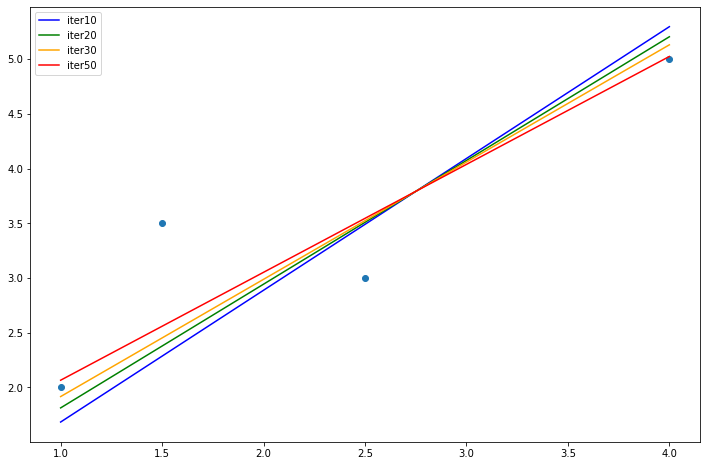

In [25]:
a = 0.12
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
M = len(y)
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red'}
for i in range(51):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i}={L}')
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

In [10]:
sum((x*3 + 1 - y[i])*x for i, x in enumerate(X))/len(y)

12.6875

In [17]:
sum(.5*(x*3 + 1 - y[i])**2 for i, x in enumerate(X))/len(y)

12.78125